# **#29 Melakukan random sampling pada Data Frame**

**Import Modules**

In [4]:
import pandas as pd

print(pd.__version__)

2.2.2


**Persiapan Data Frame**

In [7]:
d = {'col_1':[1, 2, 3, 4, 5], 
     'col_2':[10, 20, 30, 40, 50]}
df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


**Random sampling with/without replacement**

- Method sample() membutuhkan 3 buah parameter
- Parameter pertama adalah jumlah data
- Parameter kedua adalah sampling with / without replacement
- Parameter ketiga berkorelasi dengan random sheet number. Fungsi ini bertujuan untuk menjamin suatu eksperimen bisa di replikasi dengan hasil yang sama persis 

In [15]:
#Mengambil sampel sebanyak 4 baris tanpa penggantian dan menggunakan random state 0
df.sample(n = 4, replace = False, random_state = 0)

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


#Mengambil sampel sebanyak 4 baris dengan penggantian dan menggunakan random state 0
df.sample(n = 4, replace = True, random_state = 0)

# **#30 Akses nilai variable pada query()**

**Import Modules**

In [21]:
import pandas as pd
import numpy as np 

print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


**Persiapan Data Frame**

In [24]:
#Membuat data frame 5 baris dan 5 kolom 
n_rows = 5
n_cols = 5

#Memberi nama setiap kolom 'A', 'B', 'C', 'D', dan 'E'
cols = tuple('ABCDE')

#Isi setiap kolom berupa random integer dengan rentang 1 -20
df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df

,A,B,C,D,E
0,9,16,3,13,8
1,14,17,2,8,3
2,1,7,14,5,11
3,11,5,2,12,3
4,12,19,15,16,2


**Akses nilai variable pada query()**

In [27]:
#Menyeleksi baris pada kolom A yang memiliki nilai lebih dari 10
df.query('A > 10') 

,A,B,C,D,E
1,14,17,2,8,3
3,11,5,2,12,3
4,12,19,15,16,2


In [29]:
#Menghitung rata-rata dari kolom A
rerata = df['A'].mean() 
rerata

9.4

In [31]:
df.query('A > @rerata') #Menampilkan baris nilai yang lebih besar dari rata-rata

,A,B,C,D,E
1,14,17,2,8,3
3,11,5,2,12,3
4,12,19,15,16,2


# **#31 Mengenal tipe data ordinal pada Pandas**

**Import Modules**

In [37]:
import pandas as pd

print(pd.__version__)

2.2.2


**Persiapan Data Frame**

In [40]:
d = {'pelanggan':[11, 12, 13, 14], 
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


**Tipe Data ordinal pada Pandas**

- Untuk memberi tahu komputer cara menilai tingkatan ordinal, dapat digunakan module CategoricalDtype dari pandas.api.types
- CategoricalDtype digunakan untuk menspesifikasikan urutan tingkatan ordinal.

In [43]:
from pandas.api.types import CategoricalDtype

#Membuat tingkat kepuasan sebagai tipe data kategorikal dengan urutan tertentu
tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], ordered = True)

#Mengubah tipe data kolom 'kepuasan' menjadi tingkat_kepuasan
df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [45]:
#Mengurutkan DataFrame berdasarkan kolom 'kepuasan' secara ascending
df = df.sort_values('kepuasan', ascending=True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [47]:
#Menampilkan DataFrame yang nilai kolom 'kepuasan' lebih besar dari 'cukup'
df[df['kepuasan'] >= 'cukup']

,pelanggan,kepuasan
1,12,cukup
3,14,cukup
0,11,baik


# **#32 Plotting dari suatu Pandas Data Frame**

**Import Modules**

In [51]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


**Persiapan Data Frame**

In [55]:
#Membuat dataframe dengan 40 baris dan 5 kolom dengan nama kolom yang berasal dari tuple
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

#Value dari setiap kolom berisi integer rentang 1 - 20
df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), 
                  columns=cols)
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


**Line Plot**

- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai line
- Untuk menampilkan beberapa kolom saja kita bisa menggunakan df[[...]].plot().

In [57]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: >

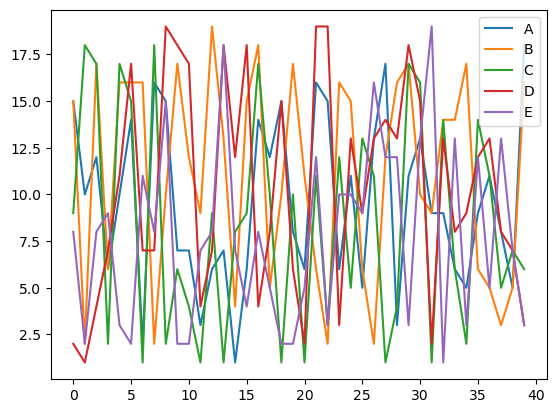

In [59]:
#Menggunakan plot untuk membuat grafik garis
df.plot(kind='line')

<Axes: >

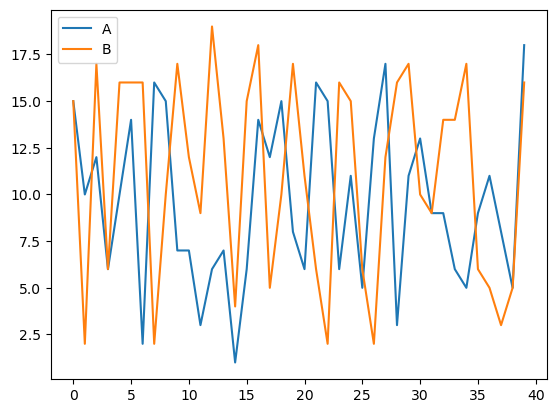

In [62]:
#Menggunakan plot untuk membuat grafik garis dari kolom 'A' dan 'B'
df[['A', 'B']].plot(kind='line')

**Bar Plot**

- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil - fungsi df.plot() yang diberi parameter kind yang bernilai bar. Untuk menampilkan bar secara horizontal kita dapat menggantikan bar dengan barh

In [64]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: >

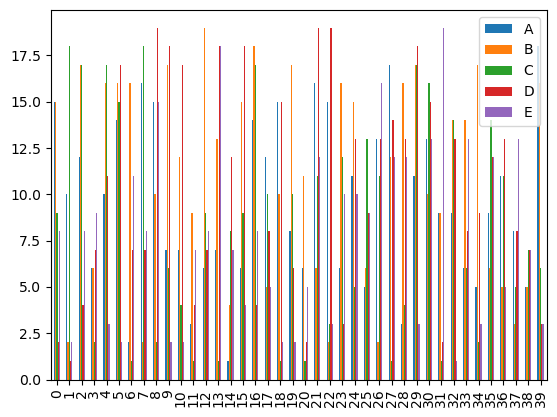

In [68]:
#Menggunakan plot untuk membuat grafik batang dari seluruh kolom
df.plot(kind = 'bar')

<Axes: >

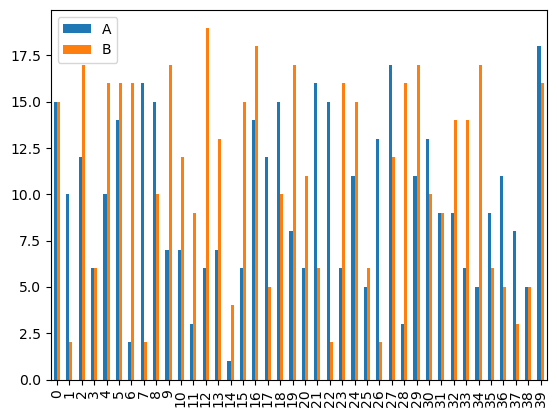

In [70]:
#Menggunakan plot untuk membuat grafik batang dari kolom A dan B
df[['A', 'B']].plot(kind = 'bar')

<Axes: >

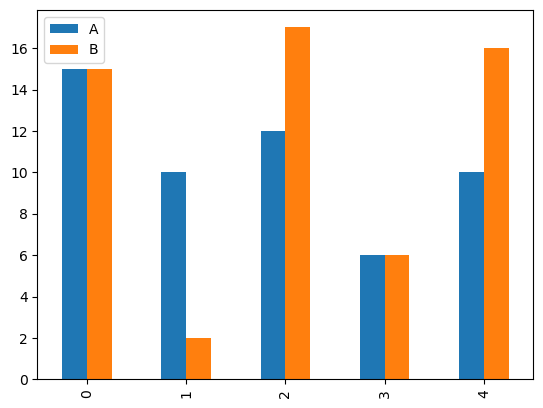

In [72]:
#Menggunakan plot untuk membuat grafik batang dari lima baris pertama kolom A dan B
df[['A', 'B']].head().plot(kind='bar')

<Axes: >

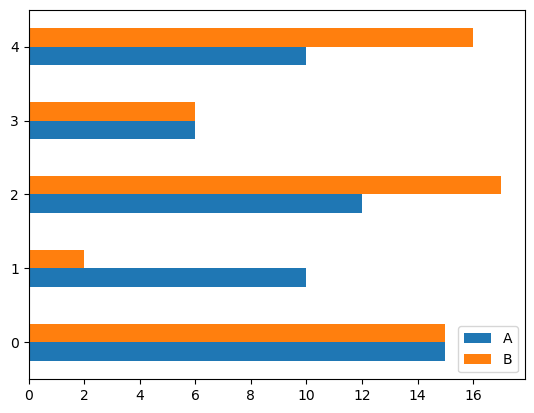

In [74]:
#Menggunakan plot untuk membuat grafik batang horizontal dari lima baris pertama kolom A dan B
df[['A', 'B']].head().plot(kind = 'barh')

**Area Plot**

- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai area

In [78]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: >

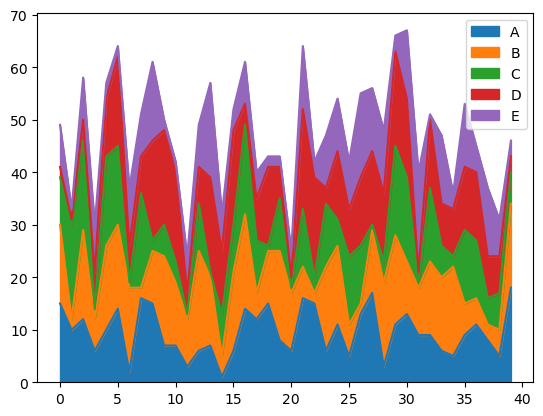

In [80]:
#Menggunakan plot untuk membuat grafik area dari seluruh dataframe
df.plot(kind='area')

<Axes: >

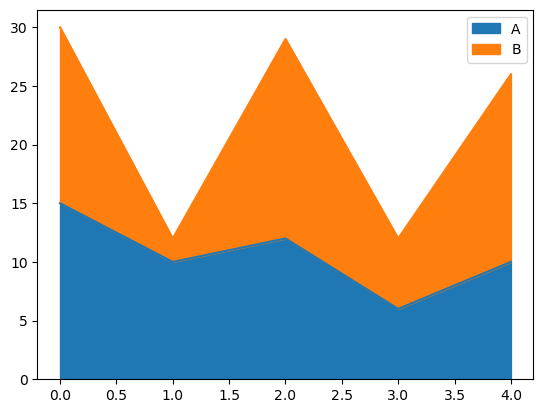

In [82]:
#Menggunakan plot untuk membuat grafik area dari kolom A dan B pada lima baris pertama dataframe
df[['A', 'B']].head().plot(kind = 'area')

**Box Plot**

- Untuk melakukan visualisasi data sebagai line.plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai box

In [86]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: >

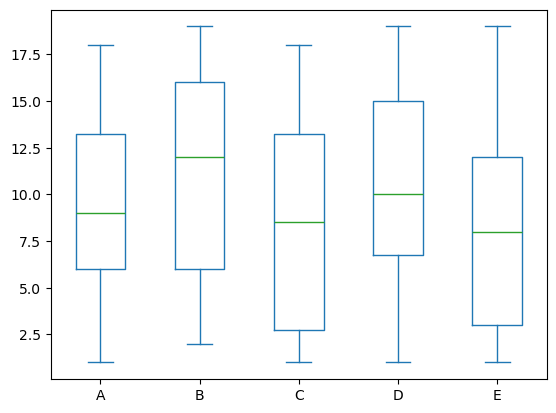

In [90]:
#Menggunakan plot untuk membuat box plot dari seluruh dataframe
df.plot(kind = 'box')

**Histogram**

- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai hist

In [94]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: ylabel='Frequency'>

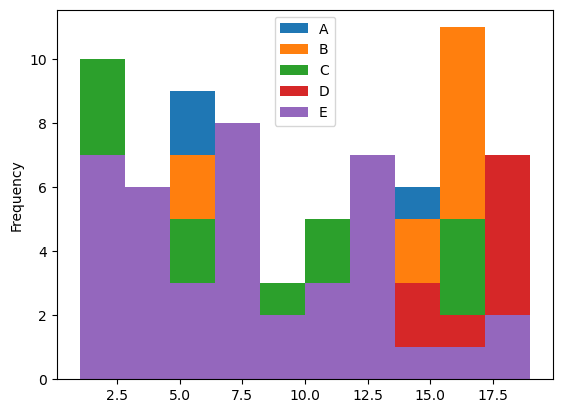

In [96]:
#Menggunakan plot untuk membuat histogram dari seluruh dataframe
df.plot(kind='hist')

<Axes: ylabel='Frequency'>

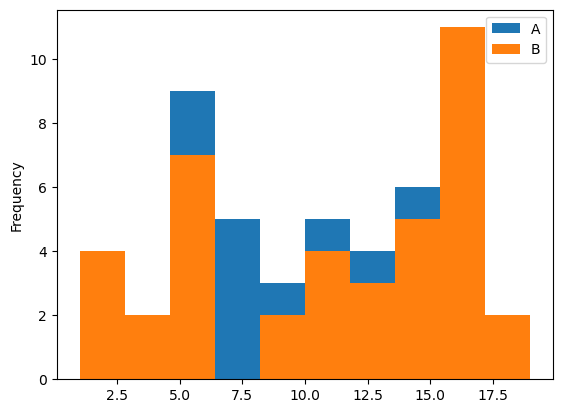

In [98]:
#Menggunakan plot untuk membuat histogram dari kolom 'A' dan 'B'
df[['A', 'B']].plot(kind='hist')

**Kernel Density Estimation (KDE)**

- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai kde

In [101]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: ylabel='Density'>

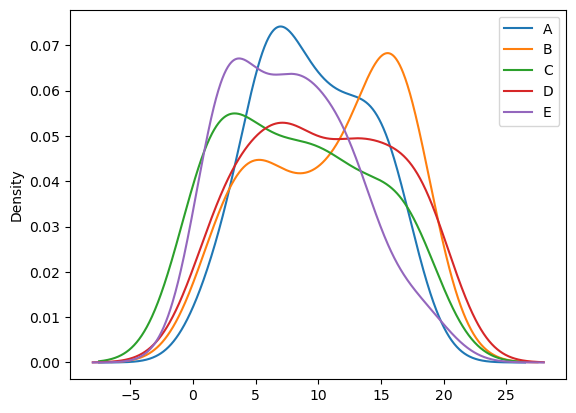

In [103]:
#Menggunakan plot untuk membuat KDE (Kernel Density Estimation) dari seluruh DataFrame
df.plot(kind='kde')

**Scatter Plot**

- Untuk melakukan visualisasi data sebagai line plot, kita bisa memanggil fungsi df.plot() yang diberi parameter kind yang bernilai scatter 

In [107]:
df.head()

,A,B,C,D,E
0,15,15,9,2,8
1,10,2,18,1,2
2,12,17,17,4,8
3,6,6,2,7,9
4,10,16,17,11,3


<Axes: xlabel='A', ylabel='B'>

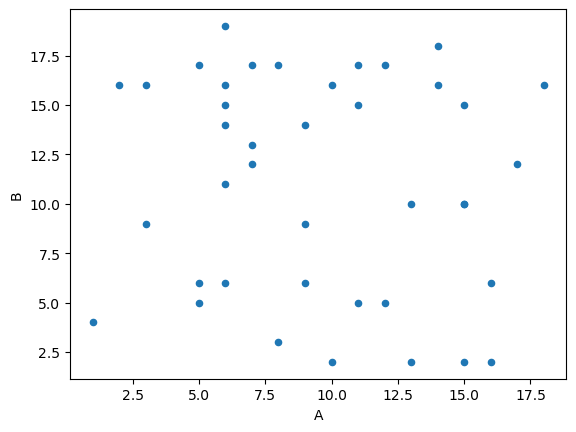

In [109]:
#Menggunakan plot untuk membuat scatter plot dengan sumbu x='A' dan sumbu y='B'
df.plot(x = 'A', y='B', kind = 'scatter')